In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid', {'grid.linestyle': u'--'})
matplotlib.rc('pdf', fonttype=42)

Populating the interactive namespace from numpy and matplotlib


## Retention storage iteration

We have an uncontrolled retention storage at a river with given inflow time series. Moreover, the function between storage volume and water level, the function of water level and discharge (with given outflow cross section) and the water balance of the storage are given.

States and fluxes are calculated iteratively.

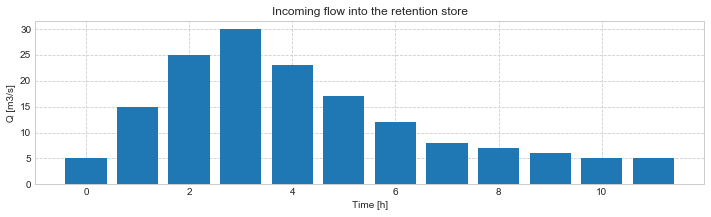

In [2]:
figsize(12,3)
Q_x=np.array([5, 15, 25, 30, 23, 17, 12, 8, 7, 6, 5, 5]).astype(float)
bar(np.arange(len(Q_x)),Q_x)
xlabel('Time [h]')
ylabel('Q [m3/s]')
title('Incoming flow into the retention store')
savefig('inflow.pdf',bbox_inch='tight')

In [3]:
def Q_ab(h,A):
    #given function of water level and discharge from storage
    return 0.5*A*np.sqrt(2*9.81*h)

def S_it(ti,Q_a,Q_a_it,S,dt=3600.):
    #given function of the storage to calculate the new state of the storage
    #note that the inflow vector (Q_x) is used inside this fuction
    if ti==0:
        return (dt/2)*(Q_x[ti]-Q_a_it) + S
    else:
        return (dt/2)*(Q_x[ti]+Q_x[ti-1]-Q_a-Q_a_it) + S

def h_it(S_it):
    #given function of storage volume and water level
    return 0.018*np.sqrt(S_it)

def step_iter(ti,Q_a,S,A=3.,crit=0.05):
    #iteration fuction
    Q_a_it=Q_a
    S_itx=S_it(ti,Q_a,Q_a_it,S)
    Q_abx=Q_ab(h_it(S_itx),A)
    while (np.abs(Q_abx-Q_a_it)/Q_abx)>crit:
        Q_a_it=Q_abx
        S_itx=S_it(ti,Q_a,Q_a_it,S)
        Q_abx=Q_ab(h_it(S_it(ti,Q_a,Q_a_it,S)),A)
    return [Q_abx,S_itx]

In [5]:
#build discharge (Q) and storage (S) vectors
Q_abx = np.zeros(len(Q_x))
S_x = np.zeros(len(Q_x))
Q_abx2 = np.zeros(len(Q_x))
S_x2 = np.zeros(len(Q_x))

#define intial states
[Q_abx[0], S_x[0]] = step_iter(0,5.,989.86)
[Q_abx2[0], S_x2[0]] = step_iter(0,5.,989.86,A=1.5)

#calculate iteration steps
for i in np.arange(len(Q_x))[1:]:
    [Q_abx[i], S_x[i]] = step_iter(i,Q_abx[i-1], S_x[i-1])
    [Q_abx2[i], S_x2[i]] = step_iter(i,Q_abx2[i-1], S_x2[i-1],A=1.5)

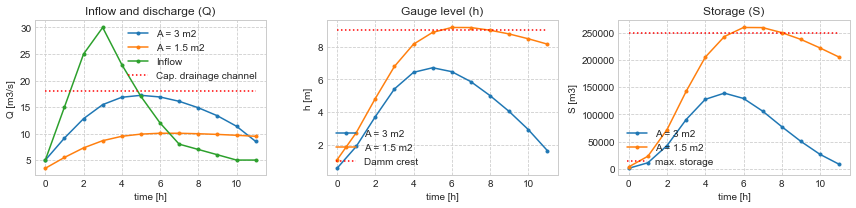

In [7]:
subplot(131)
plot(Q_abx,'.-',label='A = 3 m2')
plot(Q_abx2,'.-',label='A = 1.5 m2')
plot(Q_x,'.-',label='Inflow')
plot([0,11],[18,18],'r:',label='Cap. drainage channel')
legend(loc=1)
ylabel('Q [m3/s]')
xlabel('time [h]')
title('Inflow and discharge (Q)')

subplot(132)
plot(h_it(S_x),'.-',label='A = 3 m2')
plot(h_it(S_x2),'.-',label='A = 1.5 m2')
plot([0,11],[9,9],'r:',label='Damm crest')
legend(loc=3)
ylabel('h [m]')
xlabel('time [h]')
title('Gauge level (h)')

subplot(133)
plot(S_x,'.-',label='A = 3 m2')
plot(S_x2,'.-',label='A = 1.5 m2')
plot([0,11],[(9/0.018)**2,(9/0.018)**2],'r:',label='max. storage')
legend(loc=3)
ylabel('S [m3]')
xlabel('time [h]')
title('Storage (S)')
tight_layout()
savefig('storage_retention_result.pdf')